## Regularized Linear Regression and Bias vs. Variance using Scikit-Learn

In [4]:
%matplotlib inline
# To get nice quality plots
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

### Read Data

In [5]:
data = loadmat('ex5data1.mat')
# Training set
X = data['X'] 
y = data['y']
(m, n) = X.shape

# Cross validation set
Xval = data['Xval']
yval = data['yval']
# Test set
Xtest = data['Xtest']
ytest = data['ytest']

### Plot Data

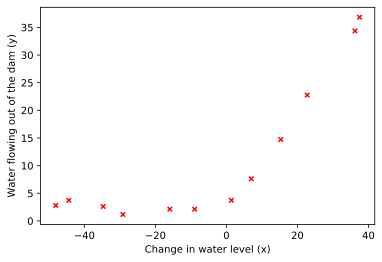

In [6]:
# Plot data
plt.scatter(X, y, marker='x', c = 'r', s = 20)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

### Model

In [8]:
# Define model:
lin_model = LinearRegression()

#Train model
lin_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Results

In [9]:
# Show learned parameters:
theta_opt = np.array([lin_model.intercept_, lin_model.coef_[0]])
print(theta_opt)

[[13.08790351]
 [ 0.36777923]]


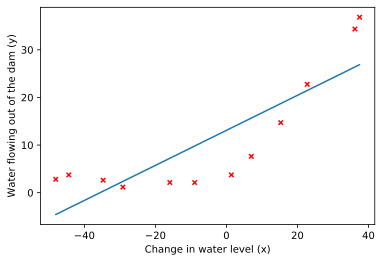

In [10]:
# Plot line
plt.scatter(X, y, marker='x', c = 'r', s = 20)
plt.plot(X, lin_model.predict(X))
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

## Polynomial Regression

### Model (without Regularization)

In [11]:
# Map X to polynomial features:
poly = PolynomialFeatures(degree=8, include_bias=False)
X_poly = poly.fit_transform(X)

# Scale features:
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

In [12]:
# Define model:
lin_model_poly = LinearRegression()

# Train model
lin_model_poly.fit(X_poly_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Results

In [13]:
# Show learned parameters
print(lin_model_poly.intercept_, lin_model_poly.coef_)

[11.21758933] [[  9.13124818  18.17727033  28.9301793  -27.23824133 -74.47076142
    6.77178106  60.68644113  20.63841717]]


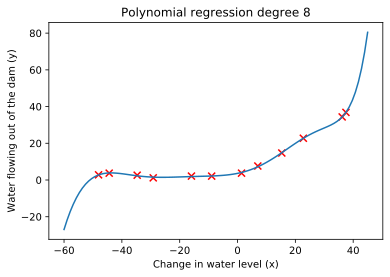

In [14]:
# Plot learned curve
plot_x = np.linspace(-60,45, 100)[:, np.newaxis]
plot_x_ft = poly.fit_transform(plot_x)
plot_x_ft_scaled = scaler.transform(plot_x_ft)
# Calculate predictions for chosen x-values
plot_y = lin_model_poly.predict(plot_x_ft_scaled)

plt.plot(plot_x, plot_y)
plt.scatter(X, y, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial regression degree 8')
plt.show()

### Model (with weak Regularization, $\lambda = 1$)

In [15]:
# Now we do the same using regularized (lambda = 1) linear regression (in scipit-learn this is called Ridge Regression)
lin_model_poly_reg = Ridge(alpha = 1)

# Train model
lin_model_poly_reg.fit(X_poly_scaled, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

#### Results

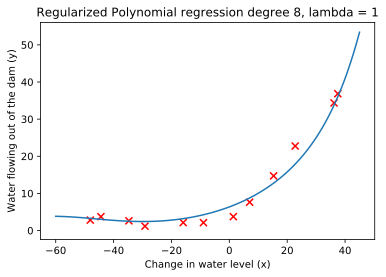

In [16]:
# Calculate predictions for chosen x-values
plot_y = lin_model_poly_reg.predict(plot_x_ft_scaled)

plt.plot(plot_x, plot_y)
plt.scatter(X, y, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Regularized Polynomial regression degree 8, lambda = 1')
plt.show()

In [18]:
# The other cases work exactly the same way.